In [1]:
import pandas as pd
import matplotlib.pyplot as pl
%matplotlib inline
import seaborn as sb
sb.set()
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv("titanic_data_set.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
df.shape

(891, 12)

In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [4]:
survived = df[df['Survived']==1]
survived.head()
print "Survived " + str(len(survived))

Survived 342


In [5]:
unsurvived = df[df['Survived']==0]
unsurvived.head()
print "UnSurvived " + str(len(unsurvived))

UnSurvived 549


In [6]:
s = (float(len(survived))/len(df)*100.0)
ns = (float(len(unsurvived))/len(df)*100.0)
print "Percentage of Survived %f" %(s) + "%"
print "Percentage of UnSurvived %f" %(s) + "%"

Percentage of Survived 38.383838%
Percentage of UnSurvived 38.383838%


In [7]:
df.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
df.groupby('Pclass').Survived.value_counts()

Pclass  Survived
1       1           136
        0            80
2       0            97
        1            87
3       0           372
        1           119
Name: Survived, dtype: int64

In [9]:
df.groupby(["Pclass","Sex"]).Survived.value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

In [10]:
df.groupby("Pclass").Sex.value_counts()

Pclass  Sex   
1       male      122
        female     94
2       male      108
        female     76
3       male      347
        female    144
Name: Sex, dtype: int64

In [11]:
a = df.groupby(["Pclass","Sex"]).Survived.value_counts()
for key, values, in a.iteritems():
    print key, values

(1L, 'female', 1L) 91
(1L, 'female', 0L) 3
(1L, 'male', 0L) 77
(1L, 'male', 1L) 45
(2L, 'female', 1L) 70
(2L, 'female', 0L) 6
(2L, 'male', 0L) 91
(2L, 'male', 1L) 17
(3L, 'female', 0L) 72
(3L, 'female', 1L) 72
(3L, 'male', 0L) 300
(3L, 'male', 1L) 47


In [12]:
per_class1_female_survived = a[1,'female',1].astype('float32')/(a[1,'female',1]+a[1,'female',0]).astype('float32')
f1 = per_class1_female_survived*100
print "Percentage of Female Passengers Survived from Class-1 %f" %(f1)

Percentage of Female Passengers Survived from Class-1 96.808511


In [13]:
per_class1_male_survived = a[1,'male',1].astype('float32')/(a[1,'male',1]+a[1,'male',0]).astype('float32')
m1 = per_class1_male_survived*100
print "Percentage of Male Passengers Survived from Class-1 %f" %(m1)

Percentage of Male Passengers Survived from Class-1 36.885247


In [14]:
per_class2_female_survived = a[2,'female',1].astype('float32')/(a[2,'female',1]+a[2,'female',0]).astype('float32')
f2 = per_class2_female_survived*100
print "Percentage of Female Passengers Survived from Class-2 %f" %(f2)

Percentage of Female Passengers Survived from Class-2 92.105263


In [15]:
per_class2_male_survived = a[2,'male',1].astype('float32')/(a[2,'male',1]+a[2,'male',0]).astype('float32')
m2 = per_class2_male_survived*100
print "Percentage of Male Passengers Survived from Class-2 %f" %(m2)

Percentage of Male Passengers Survived from Class-2 15.740740


In [16]:
per_class3_female_survived = a[3,'female',1].astype('float32')/(a[3,'female',1]+a[3,'female',0]).astype('float32')
f3 = per_class3_female_survived*100
print "Percentage of Female Passengers Survived from Class-3 %f" %(f3)

Percentage of Female Passengers Survived from Class-3 50.000000


In [17]:
per_class3_male_survived = a[3,'male',1].astype('float32')/(a[3,'male',1]+a[3,'male',0]).astype('float32')
m3 = per_class3_male_survived*100
print "Percentage of Male Passengers Survived from Class-3 %f" %(m3)

Percentage of Male Passengers Survived from Class-3 13.544668


In [18]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


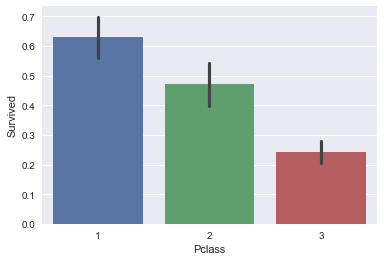

In [19]:
sb.barplot(x='Pclass', y='Survived', data=df)

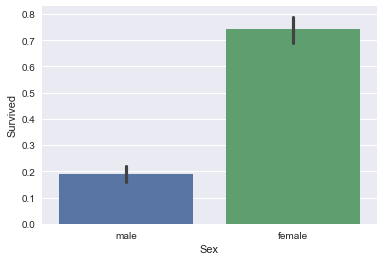

In [20]:
sb.barplot(x='Sex', y='Survived', data=df)

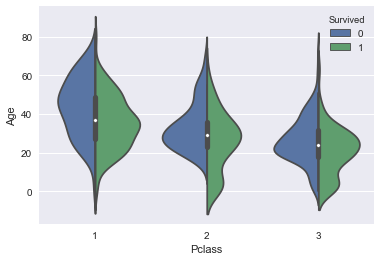

In [21]:
sb.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True)

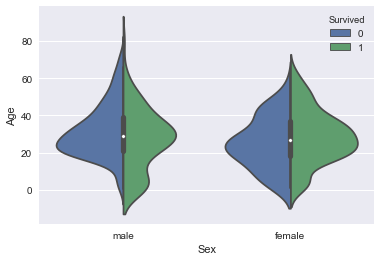

In [22]:
sb.violinplot(x='Sex', y='Age', hue='Survived', data=df, split=True)

In [23]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [24]:
age_imputer = Imputer(missing_values='NaN', strategy='mean', axis=0)
age_imputer = age_imputer.fit(df.iloc[:, [5]])
df.iloc[:, [5]] = age_imputer.transform(df.iloc[:, [5]])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [25]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [26]:
emb = df.Embarked.describe()
print emb

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object


In [28]:
most_emb = emb['top']
print "Most Frequent Embarked Port :: " + most_emb

Most Frequent Embarked Port :: S


In [29]:
df["Embarked"] = df["Embarked"].fillna(most_emb)

In [30]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,29.699118,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.000000,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,1,0,237736,30.0708,NaN,C


In [31]:
labelencoder_sex = LabelEncoder()
df.iloc[:, [4]] = labelencoder_sex.fit_transform(df.iloc[:, [4]])
df.head()

C:\Users\Public\Anaconda\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [32]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [33]:
df = pd.get_dummies(df, columns=["Pclass","Embarked"])
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1


In [34]:
df['FamilySize'] = df['Parch'] + df['SibSp'] + 1

In [35]:
df.head()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,1,0,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,0,1,2
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,0,2
2,3,1,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,0,0,1,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,1,0,0,0,0,1,2
4,5,0,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,0,0,1,0,0,1,1


In [36]:
irrelevant_features = ['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Fare']

In [37]:
df = df.drop(irrelevant_features, axis=1)

In [38]:
df.head()

,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,1,22.0,0,0,1,0,0,1,2
1,1,0,38.0,1,0,0,1,0,0,2
2,1,0,26.0,0,0,1,0,0,1,1
3,1,0,35.0,1,0,0,0,0,1,2
4,0,1,35.0,0,0,1,0,0,1,1


In [39]:
df.to_csv('titanic_prepared_data.csv', index=0)

In [40]:
df2 = pd.read_csv('titanic_prepared_data.csv')
df2.head()

,Survived,Sex,Age,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,1,22.0,0,0,1,0,0,1,2
1,1,0,38.0,1,0,0,1,0,0,2
2,1,0,26.0,0,0,1,0,0,1,1
3,1,0,35.0,1,0,0,0,0,1,2
4,0,1,35.0,0,0,1,0,0,1,1
